In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Measuring eucledean Distance between two data points

In [16]:
# assuming a,b aer list of coordinates
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

### Step 2: Centroid Initialization

In [17]:
def init_centroids(X, k):
    indices = np.random.choice(len(X), size=k, replace=False)
    return X[indices]

### Step 3: Assign to Nearest

In [18]:
def assign_clusters(X, centroids):
    labels = []
    for x in X:
        distances = [euclidean(x, c) for c in centroids]
        labels.append(np.argmin(distances))
    return np.array(labels)

### Step 4: Update Centroids

In [19]:
def update_centroids(X, labels, k, centroids):
    new_centroids = []
    for j in range(k):
        points = X[labels == j]
        if len(points) > 0:
            new_centroids.append(np.mean(points, axis=0))
        else:
            new_centroids.append(centroids[j])
    return np.array(new_centroids)

### Step 5: Full K means

In [20]:
def kmeans(X, k=3, max_iters=100):
    centroids = init_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k, centroids)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

### Creating custom dataset with 3 clusters

In [21]:
np.random.seed(0)
cluster_1 = np.random.randn(50, 2) + np.array([2, 2])
cluster_2 = np.random.randn(50, 2) + np.array([8, 3])
cluster_3 = np.random.randn(50, 2) + np.array([3, 8])
X = np.vstack((cluster_1, cluster_2, cluster_3))


### Applying k means

In [22]:
k = 3
labels, centroids = kmeans(X, k)

### Visualizing the result

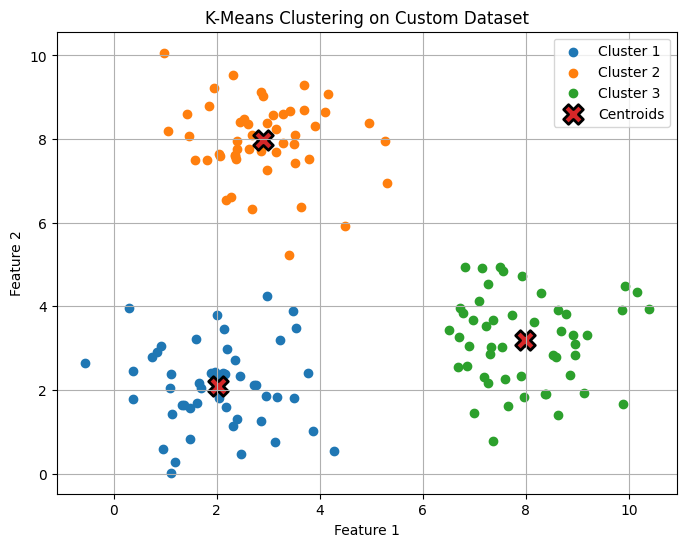

In [23]:

plt.figure(figsize=(8, 6))
for j in range(k):
    pts = X[labels == j]
    plt.scatter(pts[:, 0], pts[:, 1], label=f"Cluster {j+1}")

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker="X", s=200, linewidths=2, edgecolors="black",
            label="Centroids")

plt.title("K-Means Clustering on Custom Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
